# Decision Trees

# Quick and Dirty Model

# Decision Trees

The **CART algorithm** is structured as a sequence of questions to try and split up the different observations into their own groups. The result of these questions is a tree like structure where the ends are terminal nodes at which point there are no more questions.  A simple example of a decision tree is as follows:

<img src='./img/titanic_tree.png' width=600/>

A decision tree is a machine learning model that works by partitioning our sample space in a hierarchical way.

How do we partition the space? The key idea is that some attributes provide more information than others when trying to make a decision.

# In Pairs:
    
You are a triage nurse at a hospital being inundated with patients who believe they are suffering from coronavirus.  You neeed to quickly assess which patients are most likely to have coronavirus, and separate them from the rest of the patients.      

Based on what you know of the virus, create a list of a few questions and a flow chart to help you to quickly decide which patients should be separated.  

## High level of how the Decision Tree algorithm works

* Select the best attribute using Attribute Selection Measures (Gini/Entropy) to split the records.
* Make that attribute a decision node and breaks the dataset into smaller subsets.
* Starts tree building by repeating this process recursively for each child until one of these conditions will match:
    * All the tuples belong to the same attribute value.
    * There are no more remaining attributes.
    * There are no more instances.

### Important Terminology related to Decision Trees
Let’s look at the basic terminologies used with Decision trees:

- **Root Node:** It represents entire population or sample and this further gets divided into two or more homogeneous sets.
- **Decision Node:** When a sub-node splits into further sub-nodes, then it is called decision node.
- **Leaf/ Terminal Node:** Nodes with no children (no further split) is called Leaf or Terminal node.
- **Pruning:** When we reduce the size of decision trees by removing nodes (opposite of Splitting), the process is called pruning.
- **Branch / Sub-Tree:** A sub section of decision tree is called branch or sub-tree.
- **Parent and Child Node:** A node, which is divided into sub-nodes is called parent node of sub-nodes where as sub-nodes are the child of parent node.


<img src='./img/decision_leaf.webp' width=600 />

## Partitioning

I partition my data by asking a question about the independent variables. The goal is to ask the right questions in the right order so that the resultant groups are "pure" with respect to the dependent variable. More on this below!

Suppose, for example, that I choose:

### Is the animal a dog?

This would divide my data into two groups:

- Group 1 (Dog = 0):

data points: 1,6,7

- Group 2 (Dog = 1):

data points:  0,2,3,4,5,8,9


#### Key Question: How are the values of the target distributed in this group?

In Group 1, I have: adoption, no adoption, no adoption

In Group 2, I have, in order: adoption, adoption, adoption, no adoption, no adoption, no adoption, adoption

This seems like an ok split:   
  - The first group is majority no adoptions (2/3), so it suggests cats are unlikely to get adopted.   
  - The second group has captured most of the adoptions, but there is only a slight majority of adoptions over no adoptions (4/7)

Would a different question split our data more effectively? Let's try:

### Is the animal female?

Let's look at our splits:

- Group 1 (Female = 0):

data points: 5,7,8

- Group 2 (Female = 1):


data points: 0,1,2,3,4,6,9


In Group 1, I have: no adoption, no adoption, no adoption  
In Group 2, I have: adoption, adoption, adoption, adoption, no adoption, no adoption, adoption

That seems better:  
  - Group 1 is a pure group, no adoption when sex is male
  - Group 2 has 5/7 adoptions.
  
This seems like a much better split.

So a (very simple!) model based on the above sample predicts:  
(i) A female animal will be adopted  
(ii) A male animal will not be adopted  

would perform fairly well.  

But how would my partition be *best* split? And how do I really know that the second split is better than the first? Can I do better than intuition here?  

## Entropy and Information Gain

The goal is to have our ultimate classes be fully "ordered" (for a binary dependent variable, we'd have the 1's in one group and the 0's in the other). So one way to assess the value of a split is to measure how *disordered* our groups are, and there is a notion of *entropy* that measures precisely this.

The entropy of the whole dataset is given by:

$\large E = -\Sigma^n_i p_i\log_2(p_i)$,

where $p_i$ is the probability of belonging to the $i$th group, where $n$ is the number of groups (i.e. target values).

**Entropy will always be between 0 and 1. The closer to 1, the more disordered your group.**

<img src='./img/Entropy_mapped.png' width=600/>

To repeat, in the present case we have only two groups of interest: adoption and no adoption.

5 out of 10 were adopted and 5 out of 10 were not adopted, so **these are the relevant probabilities** for our calculation of entropy.

So our entropy for the sample above is:

$-0.5*\log_2(0.5) -0.5*\log_2(0.5)$.

Let's use the ``numpy's`` `log2()` function to calculate this:

Now, on your own, calculate the entropy of the training set.

In [20]:
values, counts = np.unique(y_train, return_counts=True)

print(values)
print(counts)

p_0 = counts[0]/sum(counts)
p_1 = counts[1]/sum(counts)

print(p_0, p_1)

def entropy(p_0,p_1):
    
    "entropy of a dataset with binary outcomes"
    
    entropy = (-p_0)*np.log2(p_0) - p_1*np.log2(p_1)
    return entropy
    
entropy(p_0, p_1)

[0 1]
[373 349]
0.5166204986149584 0.48337950138504154


0.9992027901802841

To calculate the entropy of a *split*, we're going to want to calculate the entropy of each of the groups made by the split, and then calculate a weighted average of those groups' entropies––weighted, that is, by the size of the groups. Let's calculate the entropy of the split produced by our "is our animal a dog" question:

Group 1 (not a dog): adoption, no adoption, no adoption



$E_{g1} = - 2/3 * \log_2(2/3) - 1/3 * \log_2(1/3)$. 

Group 2: adoption, adoption, adoption, no adoption, no adoption, no adoption, adoption  
$E_{g2} = -\frac{3}{7} * \log_2\left(\frac{3}{7}\right) - \frac{4}{7} * \log_2\left(\frac{4}{7}\right)$.




Now weight those by the probability of each group, and sum them, to find the entropy of the split:

Compare that to the male/female question:

Weighted sum

For a given split, the **information gain** is simply the entropy of the parent group less the entropy of the split.

For a given parent, then, we maximize our model's performance by *minimizing* the split's entropy.

What we'd like to do then is:

1. to look at the entropies of all possible splits, and
2. to choose the split with the lowest entropy.

In practice there are far too many splits for it to be practical for a person to calculate all these different entropies ...

... but we can make computers do these calculations for us!

## Gini Impurity

An alternative metric to entropy comes from the work of Corrado Gini. The Gini Impurity is defined as:

$\large G = 1 - \Sigma_ip_i^2$, or, equivalently, $\large G = \Sigma_ip_i(1-p_i)$.

where, again, $p_i$ is the probability of belonging to the $i$th group.

**Gini Impurity will always be between 0 and 0.5. The closer to 0.5, the more disordered your group.**

# Pairs (3 minutes)

- Calculate the Gini score for both the dog split and the female split.  
- Decide which is best, i.e. which to split on first
- Change the hyperparameter to Gini, and print the tree like above to confirm your work

Group 1 (not a dog): adoption, no adoption, no adoption  
Group 2 (dog): adoption, adoption, adoption, no adoption, no adoption, no adoption, adoption  

In Group 1 (male), I have: no adoption, no adoption, no adoption  
In Group 2 (female), I have: adoption, adoption, adoption, adoption, no adoption, no adoption, adoption

In [28]:
g1_l = 1 - ((1/3)**2 + (2/3)**2)
g1_r = 1 - ((4/7)**2 + (3/7)**2)

gini_split = 3/10 * g1_l + (7/10) ** 2
gini_split

0.6233333333333333

In [29]:
g1_l = 1 - ((3/3)**2 + 0)
g1_r = 1 - ((5/7)**2 + (2/7)**2)

gini_split = 3/10 * g1_l + (7/10) ** 2
gini_split
g1_l+g1_r

0.40816326530612246

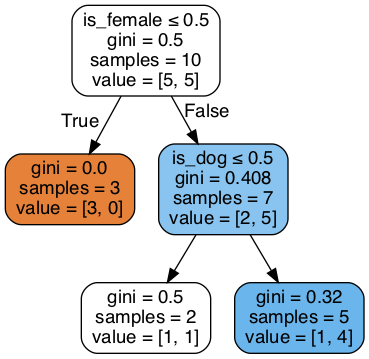

In [31]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, 
               feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Issues with Decision Trees

### Decision trees are prone to overfitting

Let's add back in age_in_days and refit the tree


That is a good visual to go represent an overfit tree.  Let's look at the accuracy.

That super high accuracy score is a telltale sign of an overfit model.

### Bias-Variance with Decision Trees

The CART algorithm will repeatedly partition data into smaller and smaller subsets until those final subsets are homogeneous in terms of the outcome variable. In practice this often means that the final subsets (known as the leaves of the tree) each consist of only one or a few data points. 

This results in low-bias, high variance trees.


## Stopping Criterion - Pruning Parameters


The recursive binary splitting procedure described above needs to know when to stop splitting as it works its way down the tree with the training data.

**min_samples_leaf:**  The most common stopping procedure is to use a minimum count on the number of training instances assigned to each leaf node. If the count is less than some minimum then the split is not accepted and the node is taken as a final leaf node.

**max_leaf_nodes:** 
Reduce the number of leaf nodes

**max_depth:**
Reduce the depth of the tree to build a generalized tree
Set the depth of the tree to 3, 5, 10 depending after verification on test data

**min_impurity_split :**
A node will split if its impurity is above the threshold, otherwise it is a leaf.


Let's try limiting the depth:

Let's try limiting minimum samples per leaf:

## Decision trees are very senstitive to training data

Let's fit two trees that differ only by 1 sample, and look at the difference.

## Greediness

Decision trees will always split on the features with the most advantageous split. 

Take the above example.  The algorithm never uses the is_dog or is_female columns. This could obscure valuable information held in those variables.  

We will see how to overcome greediness with Random Forests.



## Feature Importances

The fitted tree has an attribute called `ct.feature_importances_`. What does this mean? Roughly, the importance (or "Gini importance") of a feature is a sort of weighted average of the impurity decrease at internal nodes that make use of the feature. The weighting comes from the number of samples that depend on the relevant nodes.

More on feature importances [here](https://towardsdatascience.com/the-mathematics-of-decision-trees-random-forest-and-feature-importance-in-scikit-learn-and-spark-f2861df67e3)

# Conclusions

Decision Tree is a white box type of ML algorithm. It shares internal decision-making logic, which is not available in the black box type of algorithms such as Neural Network. Its training time is faster compared to the neural network algorithm. The time complexity of decision trees is a function of the number of records and number of attributes in the given data. The decision tree is a non-parametric method, which does not depend upon probability distribution assumptions. Decision trees can handle high dimensional data with good accuracy.

#### Pros
- Decision trees are easy to interpret and visualize.
- It can easily capture non-linear patterns.
- It requires little data preprocessing from the user, for example, there is no need to normalize columns.
- It can be used for feature engineering such as predicting missing values, suitable for variable selection.
- The decision tree has no assumptions about distribution because of the non-parametric nature of the algorithm.

#### Cons
- Sensitive to noisy data. It can overfit noisy data.
- The small variation(or variance) in data can result in the different decision tree. This can be reduced by bagging and boosting algorithms.
- Decision trees are biased with imbalance dataset, so it is recommended that balance out the dataset before creating the decision tree.